In [2]:
!pip install git+https://github.com/huggingface/transformers.git


  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-mqhv1gp3
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-mqhv1gp3
  Resolved https://github.com/huggingface/transformers.git to commit 2c60a442f34e4edcb009e022ed4af6d851094edb
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.52.0.dev0-py3-none-any.whl size=11448197 sha256=8f060bb5a7148e842a28a5be3620b71c30d07befa9352037c7709c79676954b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-i01fn5fj/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3


In [1]:
!pip install -q --upgrade torch peft bitsandbytes trl accelerate einops tqdm scipy triton unsloth xformers cut_cross_entropy unsloth_zoo sentencepiece protobuf datasets huggingface_hub hf_transfer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import os
import unsloth
from datasets import load_dataset
import torch
from transformers import Qwen2VLForConditionalGeneration, Qwen2VLProcessor, BitsAndBytesConfig
from unsloth import FastVisionModel

from peft import LoraConfig, get_peft_model
from trl import SFTConfig, SFTTrainer

import warnings
warnings.filterwarnings("ignore")

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
Unsloth: Failed to patch Gemma3ForConditionalGeneration.
🦥 Unsloth Zoo will now patch everything to make training faster!


README.md:   0%|          | 0.00/852 [00:00<?, ?B/s]

(…)-00000-of-00003-49492f364babfa44.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

(…)-00001-of-00003-7302bae5e425bbc7.parquet:   0%|          | 0.00/311M [00:00<?, ?B/s]

(…)-00002-of-00003-194c9400785577a2.parquet:   0%|          | 0.00/315M [00:00<?, ?B/s]

(…)-00000-of-00001-0f11003c77497969.parquet:   0%|          | 0.00/50.2M [00:00<?, ?B/s]

(…)-00000-of-00001-e2cd0b7a0f9eb20d.parquet:   0%|          | 0.00/68.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28299 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/1920 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2500 [00:00<?, ? examples/s]

Processed 1/283 images
Processed 21/283 images
Processed 41/283 images
Processed 61/283 images
Processed 81/283 images
Processed 101/283 images
Processed 121/283 images
Processed 141/283 images
Processed 161/283 images
Processed 181/283 images
Processed 201/283 images
Processed 221/283 images
Processed 241/283 images
Processed 261/283 images
Processed 281/283 images

Image Dimension Analysis:
Maximum dimensions: 918x1193
Minimum dimensions: 200x281
Average dimensions: 387.42x444.86

Most common image dimensions:
1. 310x454: 6 images (2.12%)
2. 310x437: 4 images (1.41%)
3. 624x872: 4 images (1.41%)
4. 415x398: 4 images (1.41%)
5. 310x463: 4 images (1.41%)
6. 422x359: 2 images (0.71%)
7. 314x281: 2 images (0.71%)
8. 420x349: 2 images (0.71%)
9. 310x394: 2 images (0.71%)
10. 310x373: 2 images (0.71%)
Image dimension analysis chart saved as 'image_dimension_analysis.png'


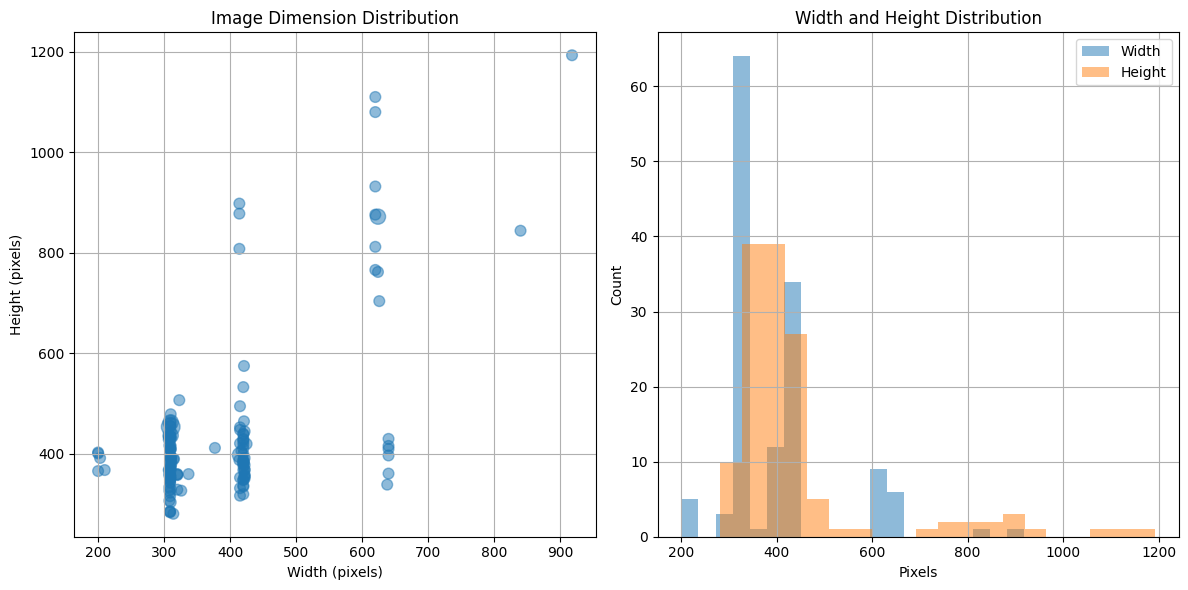

In [4]:
data = load_dataset('HuggingFaceM4/ChartQA', split="train[:1%]")

import pandas as pd
from PIL import Image
from io import BytesIO
import requests
df = pd.DataFrame(data)

max_width = 0
max_height = 0
min_width = float('inf')
min_height = float('inf')
avg_width = 0
avg_height = 0

shape_counts = {}

for i, row in enumerate(data):
    try:
        img = row['image']
        if isinstance(img, str) and (img.startswith("http://") or img.startswith("https://")):
            response = requests.get(img)
            img = Image.open(BytesIO(response.content))

        width, height = img.size

        max_width = max(max_width, width)
        max_height = max(max_height, height)

        min_width = min(min_width, width)
        min_height = min(min_height, height)

        avg_width += width
        avg_height += height

        shape = (width, height)
        shape_counts[shape] = shape_counts.get(shape, 0) + 1

        if i % 20 == 0:
            print(f"Processed {i+1}/{len(data)} images")

    except Exception as e:
        print(f"Error processing image at index {i}: {e}")

if len(data) > 0:
    avg_width /= len(data)
    avg_height /= len(data)

common_shapes = sorted(shape_counts.items(), key=lambda x: x[1], reverse=True)

print("\nImage Dimension Analysis:")
print(f"Maximum dimensions: {max_width}x{max_height}")
print(f"Minimum dimensions: {min_width}x{min_height}")
print(f"Average dimensions: {avg_width:.2f}x{avg_height:.2f}")

print("\nMost common image dimensions:")
for i, ((width, height), count) in enumerate(common_shapes[:10]):
    print(f"{i+1}. {width}x{height}: {count} images ({count/len(data)*100:.2f}%)")




try:
    import matplotlib.pyplot as plt

    widths = [shape[0] for shape, _ in shape_counts.items()]
    heights = [shape[1] for shape, _ in shape_counts.items()]
    counts = [count for _, count in shape_counts.items()]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(widths, heights, s=[c*30 for c in counts], alpha=0.5)
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')
    plt.title('Image Dimension Distribution')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.hist(widths, bins=20, alpha=0.5, label='Width')
    plt.hist(heights, bins=20, alpha=0.5, label='Height')
    plt.xlabel('Pixels')
    plt.ylabel('Count')
    plt.title('Width and Height Distribution')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('image_dimension_analysis.png')
    print("Image dimension analysis chart saved as 'image_dimension_analysis.png'")
except Exception as e:
    print(f"Could not create visualization: {e}")


In [5]:
model, processor = FastVisionModel.from_pretrained(
    "unsloth/Qwen2-VL-7B-Instruct",
    load_in_4bit=True,
    dtype=None,
    device_map="auto",
    use_gradient_checkpointing=True,




)

==((====))==  Unsloth 2025.3.19: Fast Qwen2_Vl patching. Transformers: 4.52.0.dev0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/6.85G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/4.33k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/392 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

In [6]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True,
    finetune_language_layers   = False,
    finetune_attention_modules = True,
    finetune_mlp_modules       = True,

    r = 16,
    lora_alpha = 32,
    lora_dropout = 0,
    bias = "none",
    target_modules = ['q_proj','v_proj'],
)

Unsloth: Making `model.base_model.model.model` require gradients


In [7]:
train_data,test_data,validation_data = load_dataset('HuggingFaceM4/ChartQA',split=['train[:1%]', 'test[:1%]', 'val[:1%]'])

print(train_data.shape)
print(test_data.shape)
print(validation_data.shape)

(283, 4)
(25, 4)
(19, 4)


In [8]:
system_message = """You are a highly advanced Vision Language Model (VLM), specialized in analyzing, describing, and interpreting visual data.
Your task is to process and extract meaningful insights from images, videos, and visual patterns,
leveraging multimodal understanding to provide accurate and contextually relevant information."""

def format_data(sample):
    return [
        {
            "role": "system",
            "content": [{"type": "text", "text": system_message}],
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": sample["image"],
                },
                {
                    "type": "text",
                    "text": sample["query"],
                },
            ],
        },
        {
            "role": "assistant",
            "content": [{"type": "text", "text": sample["label"][0]}],
        },
    ]

train_dataset = [format_data(sample) for sample in train_data]
validation_dataset = [format_data(sample) for sample in validation_data]
test_dataset = [format_data(sample) for sample in test_data]


print(train_dataset[0])


[{'role': 'system', 'content': [{'type': 'text', 'text': 'You are a highly advanced Vision Language Model (VLM), specialized in analyzing, describing, and interpreting visual data.\nYour task is to process and extract meaningful insights from images, videos, and visual patterns,\nleveraging multimodal understanding to provide accurate and contextually relevant information.'}]}, {'role': 'user', 'content': [{'type': 'image', 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=422x359 at 0x79FC71D5A810>}, {'type': 'text', 'text': 'Is the value of Favorable 38 in 2015?'}]}, {'role': 'assistant', 'content': [{'type': 'text', 'text': 'Yes'}]}]


In [9]:
MAX_SEQ_LEN=128
device = "cuda" if torch.cuda.is_available() else "cpu"
def text_generator(sample_data):
    text = processor.apply_chat_template(
        sample_data[0:2], tokenize=False, add_generation_prompt=True
    )

    print(f"Prompt: {text}")
    print("-"*30)

    image_inputs = sample_data[1]["content"][0]["image"]

    inputs = processor(
        text=[text],
        images = image_inputs,
        return_tensors="pt"
    )
    inputs = inputs.to(device)

    generated_ids = model.generate(**inputs, max_new_tokens=MAX_SEQ_LEN)

    output_text = processor.batch_decode(
        generated_ids, skip_special_tokens=True
    )
    del inputs
    actual_answer = sample_data[2]["content"][0]["text"]
    return output_text[0], actual_answer


generated_text, actual_answer = text_generator(test_dataset[0])
print(f"Generated Answer: {generated_text}")
print(f"Actual Answer: {actual_answer}")

Prompt: <|im_start|>system
You are a highly advanced Vision Language Model (VLM), specialized in analyzing, describing, and interpreting visual data.
Your task is to process and extract meaningful insights from images, videos, and visual patterns,
leveraging multimodal understanding to provide accurate and contextually relevant information.<|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>How many food item is shown in the bar graph?<|im_end|>
<|im_start|>assistant

------------------------------
Generated Answer: system
You are a highly advanced Vision Language Model (VLM), specialized in analyzing, describing, and interpreting visual data.
Your task is to process and extract meaningful insights from images, videos, and visual patterns,
leveraging multimodal understanding to provide accurate and contextually relevant information.
user
How many food item is shown in the bar graph?
assistant
There are 12 food items shown in the bar graph.
Actual Answer: 14


In [10]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator

FastVisionModel.for_training(model)
arguments = SFTConfig(
        per_device_train_batch_size = 2,
        per_device_eval_batch_size = 2,
        gradient_accumulation_steps = 1,
        warmup_steps = 5,
        num_train_epochs = 2,
        learning_rate = 2e-5,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "paged_adamw_32bit",
        weight_decay = 0.01,
        lr_scheduler_type = "cosine",
        output_dir = "outputs",
        report_to = "none",
        eval_steps = 70,
        save_steps = 70,
        eval_strategy = "steps",
        save_strategy = "steps",
        metric_for_best_model="eval_loss",
        load_best_model_at_end=True,

        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    )
trainer = SFTTrainer(
    model = model,
    processing_class = processor,
    data_collator = UnslothVisionDataCollator(model, processor), # Must use!
    train_dataset = train_dataset,
    eval_dataset = validation_dataset,
    args = arguments
)

Unsloth: Model does not have a default image size - using 512


In [11]:
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 283 | Num Epochs = 2 | Total steps = 284
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 1 x 1) = 2
 "-____-"     Trainable parameters = 5,046,272/7,000,000,000 (0.07% trained)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss,Validation Loss
70,1.805900,1.661787
140,0.719600,0.618013
210,0.729800,0.541167
280,0.611000,0.536027


TrainOutput(global_step=284, training_loss=1.129771127877101, metrics={'train_runtime': 831.1467, 'train_samples_per_second': 0.681, 'train_steps_per_second': 0.342, 'total_flos': 8850948576178176.0, 'train_loss': 1.129771127877101})

In [14]:
generated_text, actual_answer = text_generator(test_dataset[2])
print(f"Generated Answer: {generated_text}")
print(f"Actual Answer: {actual_answer}")

Prompt: <|im_start|>system
You are a highly advanced Vision Language Model (VLM), specialized in analyzing, describing, and interpreting visual data.
Your task is to process and extract meaningful insights from images, videos, and visual patterns,
leveraging multimodal understanding to provide accurate and contextually relevant information.<|im_end|>
<|im_start|>user
<|vision_start|><|image_pad|><|vision_end|>How many bars are shown in the chart?<|im_end|>
<|im_start|>assistant

------------------------------
Generated Answer: system
You are a highly advanced Vision Language Model (VLM), specialized in analyzing, describing, and interpreting visual data.
Your task is to process and extract meaningful insights from images, videos, and visual patterns,
leveraging multimodal understanding to provide accurate and contextually relevant information.
user
How many bars are shown in the chart?
assistant
3
Actual Answer: 3


In [15]:
from huggingface_hub import interpreter_login
interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

Enter your token (input will not be visible): ··········
Add token as git credential? (Y/n) n


In [17]:
import os



repo_name = "Amen002365/Qwen_VL_7B_on_ChartQA-Finetuned"

model.push_to_hub(repo_name, use_auth_token=True)
processor.push_to_hub(repo_name, use_auth_token=True)

No files have been modified since last commit. Skipping to prevent empty commit.


Saved model to https://huggingface.co/Amen002365/Qwen_VL_7B_on_ChartQA-Finetuned


  0%|          | 0/1 [00:00<?, ?it/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]